In [5]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
from sl_utilities import distance_functions
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12m_res7100_mhdcv'
simtype="fire2"
snap=650 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
filename_gmc = 'cloud_props_m12m_mhd_stamp_fire2650.txt'
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/sf-fire3/'
datapath="./"+simtype+"_data_pkl/" #this is teh path where the data of our tracked clusters is
gas_datapath="./"+simtype+"_gas_data_pkl/"
dirname_gmc = './' #change this! 

plot_path="./"+simtype+"_plots_with_gas/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

###############################
##############################
#load gmc catalog data
data_gmc  = astropy.io.ascii.read(dirname_gmc+filename_gmc) #data_gmc.keys() #to see content
#gind = np.where(data_gmc['mass'] > 1e6)  #leave this commented for now

gxcm  = data_gmc['xcm']
gycm  = data_gmc['ycm']
gzcm  = data_gmc['zcm']
gmtot = data_gmc['mass']
gr90  = data_gmc['r_90']
gn = len(gxcm)

############################
############################
#Doing all this trouble to store the initial mass of the clusters
fn_associations=simtype+"_associations_"+simname+"_snapshot_"+str(snap)+".pkl"  #snap determines where the cluster was taken from
fn_clusters=simtype+"_clusters_"+simname+"_snapshot_"+str(snap)+".pkl" 
with open(datapath+fn_associations, "rb") as input:
    association_data = pickle.load(input)

with open(datapath+fn_clusters, "rb") as input:
    cluster_data = pickle.load(input)
    
clustermass=[]   #it stores the mass of each cluster that was in the beginning

for c in range(len(cluster_data)):
    m=np.sum(cluster_data[c+1]["mtot"])
    clustermass.append(m)
print("These are the initial mass of each star in the cluster",clustermass)
############################
############################

print("########################## TEST: This is cluster data from first cluster",cluster_data[1])
print("####################### Total clusters present is",len(cluster_data))
print("####################### Total associations present is",len(association_data))
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

These are the initial mass of each star in the cluster [73916.7080078125, 41168.5, 56215.1044921875, 56894.609375]
########################## TEST: This is cluster data from first cluster {'cluster_groupid': 1, 'no_of_star': 5, 'id': array([ 69249076, 113841844,  38844531,  76321021,  19069093],
      dtype=uint32), 'id_children': array([0, 0, 0, 0, 0], dtype=uint32), 'is_embedded': False, 'xcm': -2.7065806433987616, 'ycm': 5.493193911741977, 'zcm': 0.08334805225085126, 'mtot': 73916.7080078125, 'r90': 0.0031252204755780255, 'r50': 0.0031086293971461405, 'rmax': 0.0035162915161754855}
####################### Total clusters present is 4
####################### Total associations present is 39


!!!!!!!!rcm: 6.1243534376319255 False
!!!!!!!!rcm: 4.240180321221868 False
!!!!!!!!rcm: 6.145070852428348 False
!!!!!!!!rcm: 4.794440299727429 True
gind: [128] drmin: 0.024419131152407767
gxcm:        xcm        
------------------
-4.775882051772849


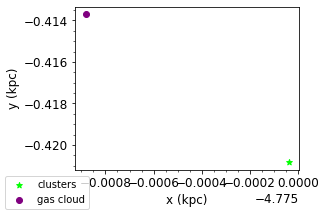

In [8]:
fig1=plt.figure()
fig1.set_size_inches(4,3)
ax=fig1.add_subplot(1,1,1)
cluster_count=0
for i in range(len(cluster_data)):                              
    x=cluster_data[cluster_count+1]["xcm"]
    y=cluster_data[cluster_count+1]["ycm"]
    z=cluster_data[cluster_count+1]["zcm"]
    rcm=(x**2+y**2+z**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (rcm>= 1) and (rcm <= 13) and (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(x, y, z, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        g=ax.scatter(gxcm[gind],gycm[gind],label="cloud",c="purple")
        c=ax.scatter(x,y,label="clusters",marker="*",c="lime")
        print("gxcm:",gxcm[gind])
    cluster_count+=1
ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12)
ax.set_ylabel("y (kpc)",fontsize=12)       
fig1.legend((c,g), ("clusters","gas cloud"),"lower left")
plot_name="clusters_and_gas_cloud_zoom_in.png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
plt.show()